## Support Vector Machines

SVM in short is a generalization of a simple and intuitive classifier called the maximal margin classifier. maximal margin classifier unfortunately cannot be applied to most data sets, since it requires that the classes be separable by a linear boundary. An extension to maximal margin classifier called support vector classifier can be applied in a broader range of cases but cannot handle non-linear cases. SVM is an extension of the support vector classifier in order to accommodate non-linear class boundaries. Support vector machines are intended for the binary classification setting in which there are two classesbiut can be applied to the case of more than two classes.

#### Hyperplane?

In a p-dimensional space, a hyperplane is a subspace of dimension P − 1. In two dimensions, a hyperplane is a flat one-dimensional subspace i'e  a line. In three dimensions, hyperplane is a flat 2-d subspace a plane. In p > 3 dimensions, it can be hard to visualize a hyperplane. In two dimensions, a hyperplane is defined by the equation $$β_0 + β_1X_1 + β_2X_2 = 0$$

Above equation defines the hyperplane. We say any point $X = (X_1,X_2)^T$ that holds above equation is a point on the hyperplane. Above equation is simply the equation of a line, since in two dimensions a hyperplane is a line. Above equation when extended to p-dimensions gives us 

$$β_0 + β_1X_1 + β_2X_2 + . . . + β_pX_p = 0$$

any point $X = (X_1,X_2,....,β_pX_p)^T$ that holds above equation is a point on the hyperplane. If the point doesn't satisfy the equation and is greater than above equation $β_0 + β_1X_1 + β_2X_2 + . . . + β_pX_p > 0$ then X lies to one side of the hyperplane or the other side of plane if its less than the equation.

<img src="../images/svm.JPG">


In the left image there are two classes of observations, shown in blue and in purple, each of which has measurements on two variables. Three separating hyperplanes, out of many possible, are shown in black. 

In the right image a separating hyperplane is shown in black. The blue and purple grid indicates the decision rule made by a classifier based on this separating hyperplane. The blue region is the set of points for which line equation is evaluated as > 0, and the purple region is the set of points for which line equation is evaluated as < 0.

<img src="../images/hyperplane.JPG">

### Maximum margin classifier

The maximal margin hyperplane represents the mid-line of the widest “slab” that we can insert between the two classes. In above picture the three training observations are equidistant from the maximal margin hyperplane and lie along the dashed lines
indicating the width of the margin. These three observations are known as support vectors, since they are vectors in p-dimensional space and they “support” the maximal margin hyperplane in the sense that if these points were moved slightly then the maximal margin hyperplane would move as well. 

### Support Vector Classifier

<img src="../images/classifier.JPG">

The left most figure above shows that the observations that belong to two classes are not necessarily separable by a hyperplane. A classifier based on a separating hyperplane which tries to perfectly classify all of the training observations leads to sensitivity to individual observations. 

As shown in the image towards right the addition of a single observation compared to middle image leads to a dramatic change in the maximal margin hyperplane. It has only a tiny margin. This is problematic because the distance of an observation from the hyperplane can be seen as a measure of our confidence that the observation was correctly classified. Also, the fact that the maximal margin hyperplane is extremely sensitive to a change in a single observation suggests that it may have overfit the training data.

Thus it is worthwhile to misclassify a few training observations in order to do a better job in classifying the remaining observations. The **support vector classifier**, sometimes called a soft margin classifier does exactly this. Rather than seeking the largest possible margin so that every observation is not only on the correct side of the hyperplane but
also on the correct side of the margin, we instead allow some observations to be on the incorrect side of the margin, or even the incorrect side of the hyperplane.

Maximum margin classifier and Support vector classifier can take care of linear decision boundaries. To handle non linear decision boundaries we need **support vector machines**.

### Support Vector Machines

<img src="../images/non_linear_boundary.JPG">

If you look at above picture the observations fall into two classes, with a non-linear boundary between them. Picture on the right shows a support vector classifier that seeks a linear boundary and consequently performs very poorly. 

When there is a nonlinear relationship between the predictors and the outcome we consider enlarging the feature space using functions of the predictors such as quadratic and cubic terms, in order to address this non-linearity. In the enlarged feature space, the decision boundary is in fact linear. But in the original feature space, the decision boundary is of the form q(x) = 0, where q is a quadratic polynomial, and its solutions are generally non-linear.


When the support vector classifier is combined with a non-linear kernel, the resulting classifier is known as a support vector machine. A kernel is a function that quantifies the similarity of two observations. Using a kernal amounts to fitting a support vector classifier in a higher-dimensional space involving polynomials of degree d, rather than in the original feature space. 



The image on the left below shows an example of an SVM with a polynomial kernel of degree 3 is applied to the non-linear data shown in above image. The fit is a substantial improvement over the linear support vector classifier and is a far more appropriate decision rule. The image shown on the right below is an SVM with a radial kernel applied to the same data.

<img src="../images/non_linear_svm.JPG">

Lets get our hands dirty with some data analysis using Support vector machines. 

The **svm()** function can be used to fit a support vector classifier when the argument kernel="linear" is used.  A `cost` argument allows us to specify the cost of a violation to the margin. When the cost argument is small, then the margins
will be wide and many support vectors will be on the margin or will violate the margin. When the cost argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin. We begin by generating the observations, which belong to two classes.

In [1]:
# Set the seed to reproduce the experiment results
set.seed(1)

# Generate a normal distribution of 40 values and form a matrix 'x' out of those values.
x=matrix(rnorm(20*2), ncol=2)

# Create a vector such that first 10 cells have value -1 and rest 10 cells have value 1.
y=c(rep(-1,10), rep(1,10))

# Increase the value of x1(first column in x) by 1. y==1 returns a vector of TRUE or FALSE based on condition. So `x[y==1,]` 
# implies it chooses last 10 rows of the matrix. Here we are increasing the values of x of last 10 rows by 1 so that they 
# are linearly separable. 
x[y==1,] = x[y==1,] + 1

Check if the classes are linearly separable

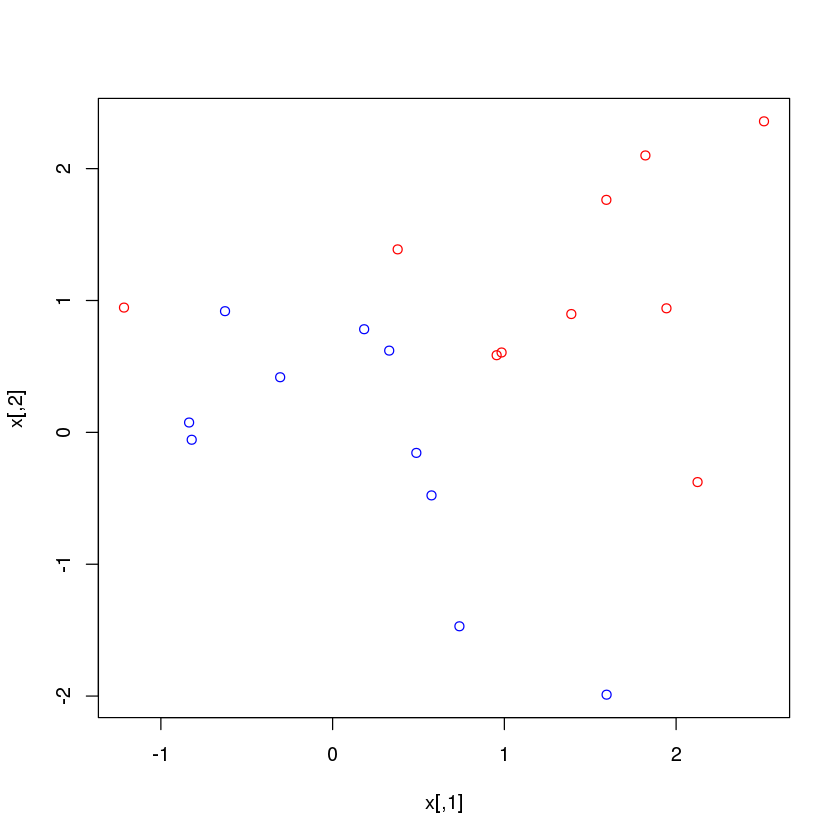

In [2]:
# Plot x values. col=(3-y) will result in the vector of values {4,4...4,2,2,...} where first 10 are 4 and rest 10 are 2. This 
# will help in plotting the first values in blue and last 10 values in red color. 
plot(x, col =(3-y))

The classes are not linearly separable. A red observation is grouped with blue observations. Fit a support vector classifier. In order for the svm() function to perform classification instead of SVM-based regression, encode the response as a factor variable. Create a data frame with the response coded as a factor.

In [3]:
dat=data.frame(x=x, y=as.factor(y))
library(e1071)
svmfit=svm(y ~., data=dat, kernel ="linear", cost =10,scale=FALSE)

The argument scale=FALSE tells the svm() function not to scale each feature to have mean zero or standard deviation one; depending on the application, one might prefer to use scale=TRUE. Plot the support vector classifier obtained above.

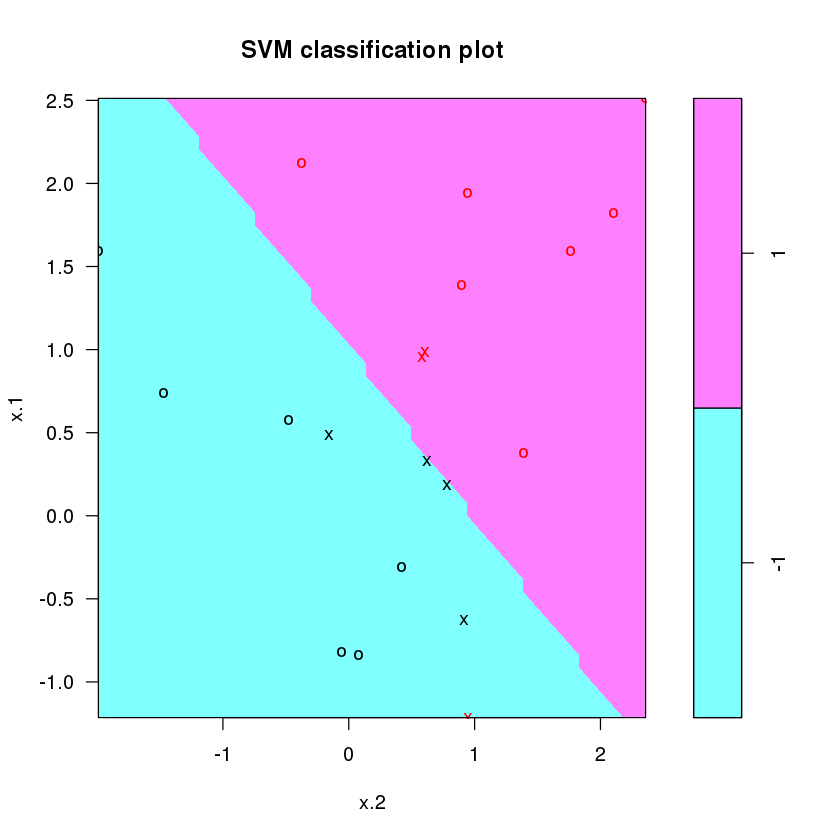

In [4]:
# Supply two arguements to plot() function, output of the call to svm() as well as the data used in the call to svm().
plot(svmfit, dat)

The region of feature space that is assigned to the −1 class is shown in light blue, and the region that is assigned to the +1 class is shown in purple. The decision boundary between the two classes is linear because of the argument kernel="linear". Note that the second feature(X2) is plotted on the x-axis and the first feature(X1) is plotted on the y-axis, in contrast to the behavior of the usual plot() function in R. Here only one observation is misclassified. The support vectors are plotted as crosses and the remaining observations are plotted as circles. Also there are seven support vectors. We can determine their identities as follows,

In [5]:
svmfit$index

[1]  1  2  5  7 14 16 17

Run summary() command to obtain some basic information about the support vector classifier

In [6]:
summary(svmfit )


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




Summary() tells us that a linear kernel was used with cost=10, and there were seven support vectors. Four support vectors are in one class and three in the other. Fit the model with smaller cost value.

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

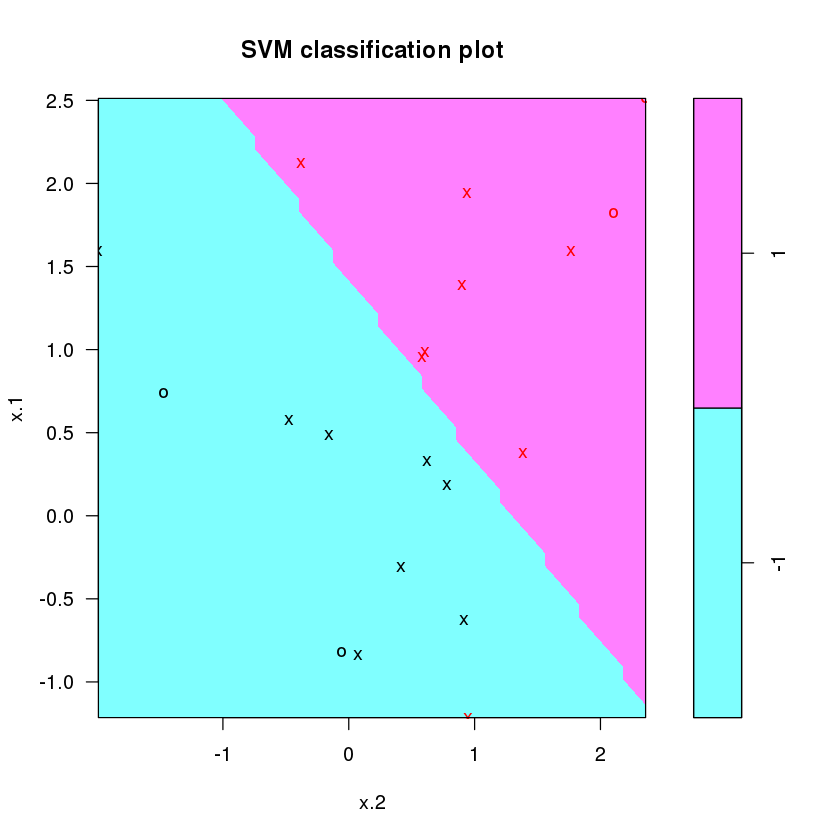

In [7]:
svmfit=svm(y~., data=dat, kernel="linear", cost=0.1, scale=FALSE)
plot(svmfit, dat)
svmfit$index

Using a smaller value of the cost parameter we got a larger number of support vectors, because the margin is now wider. The svm() function does not explicitly output the coefficients of the linear decision boundary obtained when the support vector classifier is fit, nor does it output the width of the margin.


The e1071 library includes a built-in function, `tune()`, to perform cross validation. By default, tune() performs ten-fold cross-validation on a set of models of interest. In order to use this function, pass in relevant information about the set of models that are under consideration. The following command compares SVMs with a linear kernel, using a range of values of the cost parameter.

In [8]:
set.seed (1)
tune.out=tune(svm,y~.,data=dat, kernel ="linear", ranges =list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))

Run summary() on tune.out to access the cross-validation errors for each of the models

In [9]:
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


cost=0.1 results in the lowest cross-validation error rate. The best model obtained can be accessed as below

In [10]:
bestmod = tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




The predict() function can be used to predict the class label on a set of test observations, at any given value of the cost parameter. Generate a test data set as train data is produced.

In [11]:
xtest=matrix(rnorm(20*2), ncol =2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,] = xtest[ytest==1,] + 1
testdat =data.frame(x=xtest, y=as.factor(ytest))

Predict the class labels of above test observations. The best model with cost=0.1 is used here in order to make predictions.

In [12]:
ypred=predict(bestmod, testdat)
table(predict = ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  1
     1   0  8

19 of the test observations are correctly classified with cost=0.1. Fit the support vector classifier and plot the resulting hyperplane, using a very large value of cost so that no observations are misclassified.

In [13]:
dat=data.frame(x=x,y=as.factor(y))
svmfit =svm(y~.,data=dat ,kernel ="linear",cost =1e5)
summary (svmfit )


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




No training errors were made and only three support vectors were used. However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform poorly on test data